# **# Hate Speech Detection on Tweeter Platform**

# #  Data Preprocessing

In [1]:
# importing basic packages for data preprocessing

import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Create a Porter Stemmer instance
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Importing the raw dataset









In [2]:
# Load the dataset
df = pd.read_csv('/content/labeled_dataset 1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


# Re-categorizes the classes
Encoding the labels :


*   Hate speech and offensive as 0
*   Non hate speech as 1



In [3]:
# Re-categorize the classes
df['class'] = df['class'].map({0:0,1:0,2:1})

df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna()


## Handling abbreviations and slags

In [5]:
# Define a dictionary for message short forms and slangs
abbreviations = {
    "$": "dollar",
    "€": "euro",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age sex location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "aymm": "are you my mother",
    "aint":"are not",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b+b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "b4n": "bye for now",
    "b@u": "back at you",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbbg": "bye bye be good",
    "bbc": "british broadcasting corporation",
    "bbias": "be back in a second",
    "bbl": "be back later",
    "bbs": "be back soon",
    "be4": "before",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "brt": "be right there",
    "bsaaw": "big smile and a wink",
    "btw": "by the way",
    "bwl": "bursting with laughter",
    "c/o": "care of",
    "cet": "central european time",
    "cf": "compare",
    "cia": "central intelligence agency",
    "csl": "cannot stop laughing",
    "cu": "see you",
    "cul8r": "see you later",
    "cv": "curriculum vitae",
    "cwot": "complete waste of time",
    "cya": "see you",
    "cyt": "see you tomorrow",
    "dae": "does anyone else",
    "dbmib": "do not bother me i am busy",
    "diy": "do it yourself",
    "dm": "direct message",
    "dwn": "down",
    "dont":"do not",
    "dwh": "during work hours",
    "e123": "easy as one two three",
    "eet": "eastern european time",
    "eg": "example",
    "embm": "early morning business meeting",
    "encl": "enclosed",
    "encl.": "enclosed",
    "etc": "and so on",
    "faq": "frequently asked questions",
    "fawc": "for anyone who cares",
    "fb": "facebook",
    "fc": "fingers crossed",
    "fig": "figure",
    "fimh": "forever in my heart",
    "ft.": "feet",
    "ft": "featuring",
    "ftl": "for the loss",
    "ftw": "for the win",
    "fwiw": "for what it is worth",
    "fyi": "for your information",
    "faggot": "forgot",
    "g9": "genius",
    "gahoy": "get a hold of yourself",
    "gal": "get a life",
    "gcse": "general certificate of secondary education",
    "gfn": "gone for now",
    "gg": "good game",
    "gl": "good luck",
    "glhf": "good luck have fun",
    "gmt": "greenwich mean time",
    "gmta": "great minds think alike",
    "gn": "good night",
    "g.o.a.t": "greatest of all time",
    "goat": "greatest of all time",
    "goi": "get over it",
    "gps": "global positioning system",
    "gr8": "great",
    "gratz": "congratulations",
    "gyal": "girl",
    "h&c": "hot and cold",
    "hp": "horsepower",
    "hr": "hour",
    "hrh": "his royal highness",
    "ht": "height",
    "ibrb": "i will be right back",
    "ic": "i see",
    "id":"i did",
    "icq": "i seek you",
    "icymi": "in case you missed it",
    "idc": "i do not care",
    "idgadf": "i do not give a damn fuck",
    "idgaf": "i do not give a fuck",
    "idk": "i do not know",
    "ie": "that is",
    "im":"i am",
    "isnt": "is not",
    "itd": "it would",
    "it'll":"it will",
    "its":"it is",
    "ix": "ix",
    "i.e": "that is",
    "ifyp": "i feel your pain",
    "ig": "instagram",
    "iirc": "if i remember correctly",
    "ilu": "i love you",
    "ily": "i love you",
    "imho": "in my humble opinion",
    "imo": "in my opinion",
    "imu": "i miss you",
    "iow": "in other words" ,
    "irl": "in real life",
    "j4f": "just for fun",
    "jic": "just in case",
    "jk": "just kidding",
    "jsyk": "just so you know",
    "l8r": "later",
    "lb": "pound",
    "lbs": "pounds",
    "lemmie": "let me",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lmfao": "laugh my fucking ass off",
    "lol": "laughing out loud",
    "ltd": "limited",
    "ltns": "long time no see",
    "m8": "mate",
    "mf": "motherfucker",
    "mfs": "motherfuckers",
    "mfw": "my face when",
    "mofo": "motherfucker",
    "mph": "miles per hour",
    "mr": "mister",
    "mrw": "my reaction when",
    "ms": "miss",
    "mte": "my thoughts exactly",
    "nagi": "not a good idea",
    "nbc": "national broadcasting company",
    "nbd": "not big deal",
    "nfs": "not for sale",
    "ngl": "not going to lie",
    "nhs": "national health service",
    "nrn": "no reply necessary",
    "nsfl": "not safe for life",
    "nsfw": "not safe for work",
    "nth": "nice to have",
    "nvr": "never",
    "nyc": "new york city",
    "oc": "original content",
    "og": "original",
    "ohp": "overhead projector",
    "oic": "oh i see",
    "omdb": "over my dead body",
    "omg": "oh my god",
    "omw": "on my way",
    "p.a": "per annum",
    "plz":"please",
    "p.m": "after midday",
    "pm": "prime minister",
    "poc": "people of color",
    "pov": "point of view",
    "pp": "pages",
    "ppl": "people",
    "prw": "parents are watching",
    "ps": "postscript",
    "pt": "point",
    "ptb": "please text back",
    "pto": "please turn over",
    "qpsa": "what happens",  # "que pasa",
    "ratchet": "rude",
    "rbtl": "read between the lines",
    "rlrt": "real life retweet",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "rt": "retweet",
    "rt":"retweet",
    "ru": "are you",
    "shid": "slaps head in disgust",
    "sis": "sister",
    "somy": "sick of me yet",
    "ruok": "are you ok",
    "sfw": "safe for work",
    "sk8": "skate",
    "smh": "shake my head",
    "sq": "square",
    "srsly": "seriously",
    "shouldnt": "should not",
    "ssdd": "same stuff different day",
    "tbh": "to be honest",
    "tbs": "tablespoonful",
    "tbsp": "tablespoonful",
    "tfw": "that feeling when",
    "thks": "thank you",
    "tho": "though",
    "thx": "thank you",
    "tia": "thanks in advance",
    "til": "today i learned",
    "tl;dr": "too long i did not read",
    "tldr": "too long i did not read",
    "tmb": "tweet me back",
    "tntl": "trying not to laugh",
    "txt":"text",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours forever",
    "utc": "coordinated universal time",
    "w/": "with",
    "w/o": "without",
    "w8": "wait",
    "wassup": "what is up",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go",
    "wtpa": "where the party at",
    "wuf": "where are you from",
    "wuzup": "what is up",
    "wywh": "wish you were here",
    "yd": "yard",
    "yall": "you all",
    "ygtr": "you got that right",
    "ynk": "you never know",
    "zzz": "sleeping bored and tired"
}







In [6]:
# Function to replace abbreviations in text
def expand_abbreviations(text):
    words = text.split()
    expanded_words = [abbreviations[word.lower()] if word.lower() in abbreviations else word for word in words]
    return ' '.join(expanded_words)


## Removing the stop words

In [7]:
# Define the remove_stop_words function
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]


## Handling HTML entities

In [8]:
# Function to decode HTML entities
def decode_html_entities(text):
    return html.unescape(text)

# Example function to expand contractions
def expand_contractions(text):
   expanded_text = contractions.fix(text)
   return expanded_text



##  Normalization of text

In [9]:
import html
# Normalize text
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'&', 'and', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df['tweet'] = df['tweet'].apply(normalize_text)
# Apply additional preprocessing functions
df['tweet'] = df['tweet'].apply(expand_abbreviations)


## Word Tokenization

In [10]:
 # Word Tokenization
df['tweet_tokens'] = df['tweet'].apply(word_tokenize)
 # Remove stopwords
stop_words = set(stopwords.words('english'))
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

##  Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So, it links words with similar meanings to one word.

In [11]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

##  Stemming
Stemming is a method in text processing that eliminates prefixes and suffixes from words, transforming them into their fundamental or root form, The main objective of stemming is to streamline and standardize words, enhancing the effectiveness of the natural language processing tasks

In [12]:
#Stemming
porter_stemmer = PorterStemmer()
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

##  Handling empty rows and null values

In [13]:
# Remove empty rows
df = df[df['tweet_tokens'].str.strip().astype(bool)]

# Handle missing values
df = df.dropna()

# Verify if there are any empty rows left
print(df['tweet_tokens'].isnull().sum())
df.head()


0


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_tokens
0,0,3,0,0,3,1,retweet as a woman you should not complain abo...,"[retweet, woman, complain, cleaning, house, an..."
1,1,3,0,3,0,0,retweet boy dats coldtyga down bad for cuffin ...,"[retweet, boy, dat, coldtyga, bad, cuffin, dat..."
2,2,3,0,3,0,0,retweet dawg retweet you ever fuck a bitch and...,"[retweet, dawg, retweet, ever, fuck, bitch, st..."
3,3,3,0,2,1,0,retweet she look like a tranny,"[retweet, look, like, tranny]"
4,4,6,0,6,0,0,retweet the shit you hear about me might be tr...,"[retweet, shit, hear, might, true, might, fake..."


# **# Final Encoding Method : TF-IDF (Term Frequency-Inverse Document Frequency)**
TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)

In [14]:
# Convert string representation of list to actual list first
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now you can clean up the lists
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: [word.strip("[]'").replace("'", "") for word in x] if isinstance(x, list) else x)

# Display the first few rows to verify
print("\nDataFrame after converting tweet_tokens to lists and cleaning:")
print(df.head())



DataFrame after converting tweet_tokens to lists and cleaning:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      1   
1           1      3            0                   3        0      0   
2           2      3            0                   3        0      0   
3           3      3            0                   2        1      0   
4           4      6            0                   6        0      0   

                                               tweet  \
0  retweet as a woman you should not complain abo...   
1  retweet boy dats coldtyga down bad for cuffin ...   
2  retweet dawg retweet you ever fuck a bitch and...   
3                     retweet she look like a tranny   
4  retweet the shit you hear about me might be tr...   

                                        tweet_tokens  
0  [retweet, woman, complain, cleaning, house, an...  
1  [retweet, boy, dat, coldtyga, bad, cuffin, dat.

In [15]:
X = df[['tweet_tokens']]
y = df['class']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# Check if 'tweet' column contains strings, if so, split them into lists of tokens
if isinstance(X['tweet_tokens'].iloc[0], str):
    X['tweet_tokens'] = X['tweet_tokens'].str.split()  # Split strings into lists of words

# Now join the tokens into a single string
X['tweet_tokens'] = X['tweet_tokens'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer for the 'tweet_tokens' column
column_transformer = ColumnTransformer(
    transformers=[
        ('tweet_tokens', TfidfVectorizer(), 'tweet_tokens')
    ],
    remainder='passthrough'  # This keeps the other columns as is
)

<ipython-input-16-8dfbf8cd2d41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tweet_tokens'] = X['tweet_tokens'].apply(lambda x: ' '.join(x))


# # Model Training using Convolutional Neural Network (CNN)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Flatten, SpatialDropout1D, Bidirectional, Reshape
from sklearn.metrics import accuracy_score, classification_report
# Use the 'tweet' column for text data
X = df['tweet']
# Use the 'class' column for labels
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Handle missing values in 'tweet' column
df['tweet'] = df['tweet'].fillna('')  # Replace NaN with empty strings



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Use TfidfVectorizer for the 'tweet_tokens' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['tweet'])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance by converting labels to one-hot encoding
y_categorical = to_categorical(y_encoded)


In [19]:
# Define CNN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)))
model.add(Reshape((512, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=5,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) # Flatten the output from MaxPooling1D
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

# Sort the indices of the sparse matrix
X_tfidf.sort_indices()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_categorical, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.3f}')



Epoch 1/10
620/620 [==============================] - 216s 346ms/step - loss: 0.2222 - accuracy: 0.9097 - val_loss: 0.1704 - val_accuracy: 0.9306
Epoch 2/10
620/620 [==============================] - 193s 311ms/step - loss: 0.0839 - accuracy: 0.9717 - val_loss: 0.1889 - val_accuracy: 0.9326
Epoch 3/10
620/620 [==============================] - 184s 297ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.2302 - val_accuracy: 0.9290
Epoch 4/10
620/620 [==============================] - 197s 318ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.3643 - val_accuracy: 0.9300
Epoch 5/10
620/620 [==============================] - 188s 303ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.4639 - val_accuracy: 0.9300
Epoch 6/10
620/620 [==============================] - 190s 306ms/step - loss: 0.0044 - accuracy: 0.9981 - val_loss: 0.5069 - val_accuracy: 0.9286
Epoch 7/10
155/155 [==============================] - 2s 10ms/step - loss: 0.5124 - accuracy: 0.9260
Validation accuracy: 0.

In [21]:
# Predict probabilities on the validation set
y_pred_probs = model.predict(X_val)

# Get predicted labels (class with highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Inverse transform encoded true labels to original form
y_val_original = np.argmax(y_val, axis=1)



# Extracting metrics separately
print("Accuracy:", accuracy_score(y_val_original, y_pred))
print("Classification Report:\n", classification_report(y_val_original, y_pred))

accuracy = accuracy_score(y_val_original, y_pred)

classification_report_dict = classification_report(y_val_original, y_pred, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']


155/155 [==============================] - 3s 17ms/step
Accuracy: 0.9259632842445027
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4122
           1       0.75      0.83      0.79       835

    accuracy                           0.93      4957
   macro avg       0.86      0.89      0.87      4957
weighted avg       0.93      0.93      0.93      4957



Confusion Matrix:
 [[3896  226]
 [ 141  694]]


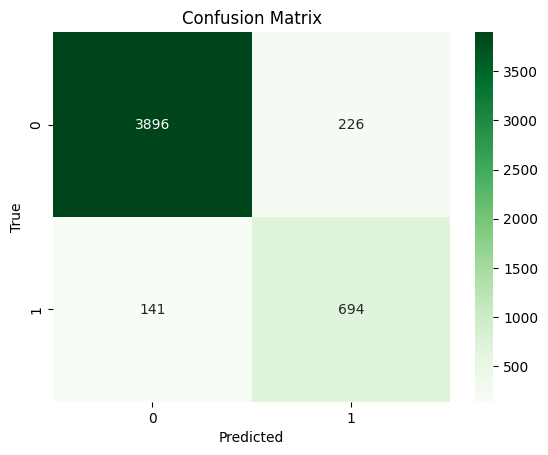

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_val_original, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()